# Regression Q3 and Q4building linear regression model and comparing with other regression models 

In [1]:
#Importing the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas import DataFrame
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#Reading the csv file
dataset = pd.read_csv('C:/Users/HP/Desktop/SampleDonorData.csv')

In [3]:
#This shows the number of rows and columns in our data
dataset.shape


(19372, 25)

In [4]:
#Summary statistics of the data
dataset.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,...,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
count,19372.000000,19372.000000,19372.000000,19372.000000,14577.000000,19372.000000,18918.000000,14980.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,3.906463,96546.225377,73.409973,58.919051,0.073198,27.861613,3.907543,0.497729,5.005397,...,341.970215,69.698999,0.504439,0.221402,0.230808,19.038900,16.584503,12.901869,18.191152,69.482088
std,0.433024,9.192082,55830.643871,41.255574,16.669382,0.260469,14.451392,1.864796,0.500008,2.815386,...,164.207807,21.711019,0.499993,0.415201,0.186230,3.415559,11.977709,4.642072,4.033065,37.568169
min,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,2.000000,4.000000,15.000000
25%,0.000000,0.000000,48289.000000,29.000000,47.000000,0.000000,15.000000,2.000000,0.000000,3.000000,...,232.000000,60.000000,0.000000,0.000000,0.100000,17.000000,10.000000,11.000000,16.000000,33.000000
50%,0.000000,0.000000,96937.000000,65.000000,60.000000,0.000000,28.000000,4.000000,0.000000,5.000000,...,311.000000,76.000000,1.000000,0.000000,0.200000,18.000000,15.000000,12.000000,18.000000,65.000000
75%,0.250000,0.250000,145429.500000,113.000000,73.000000,0.000000,40.000000,5.000000,1.000000,7.000000,...,417.000000,85.000000,1.000000,0.000000,0.333000,21.000000,20.000000,13.000000,20.000000,105.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,53.000000,7.000000,1.000000,9.000000,...,1500.000000,99.000000,1.000000,1.000000,1.000000,36.000000,450.000000,64.000000,27.000000,260.000000


In [5]:
dataset.isnull().any() #Checking for null, Na's in our data
#Filling the null/NA values with Fill method
dataset = dataset.fillna(method='ffill')
dataset.dtypes #Checking the datatypes of the variables



TARGET_B                         int64
TARGET_D                         int64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
CLUSTER_CODE                   float64
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
recency_freq_status             object
RECENT_CARD_RESPONSE_PROP      float64
MONTHS_SINCE_LAST_PROM_RESP    float64
LAST_GIFT_AMT                    int64
NUMBER_PROM_12                   int64
MONTHS_SINCE_LAST_GIFT           int64
MONTHS_SINCE_FIRST_GIFT          int64
dtype: object

In [6]:
#Counting values for all the categorical variables in the data so we know how to convert and normalize these values to run in our ML models
dataset["URBANICITY"].value_counts()  
dataset["HOME_OWNER"].value_counts()
dataset["DONOR_GENDER"].value_counts()
dataset["recency_freq_status"].value_counts()


A1    6801
A2    2304
A3    1614
F1    1452
S2    1413
S4    1376
S3    1356
A4    1199
N1     437
N2     367
N3     299
E1     265
N4      89
L1      87
S1      76
E4      69
F2      53
E2      50
E3      43
F4      10
F3       6
L2       4
L4       2
Name: recency_freq_status, dtype: int64

In [7]:
#Replacing the categorical values with numerical values
cleanup_nums = {"URBANICITY":     {"C": 0, "R": 1,"S":2,"T":3, "U":4,"?":5},
                "HOME_OWNER": {"H": 1, "U": 0},
               "DONOR_GENDER": {"M":1, "F":2,"U":3,"A":4},
                "recency_freq_status":{"A1":0,"A2":1,"A3":2,"F1":3,"S2":4,"S4":5,"S3":6,"A4":7,"N1":8,"N2":9,"N3":10,"E1":11,"N4":12,"L1":13,"S1":14,"E4":15,"F2":16,"E2":17,"E3":18,"F4":19,"F3":20,"L2":21,"L4":22}
               }

In [8]:
#Replacing the categorical values of the 4 variables with the above values.
dataset.replace(cleanup_nums, inplace=True)
dataset.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,2,20.0,0,1,...,72,0,0,2,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,0,23.0,1,1,...,97,1,0,2,0.222,18.0,37,14,18,127
2,0,0,89966,137,2.0,0,0,23.0,1,1,...,78,1,0,0,0.125,18.0,12,13,18,129
3,0,0,100147,137,2.0,0,2,21.0,1,1,...,79,1,0,1,0.125,17.0,10,7,15,130
4,0,0,148098,77,2.0,0,2,20.0,1,2,...,42,1,0,0,0.100,26.0,25,6,26,67


In [9]:
dataset.dtypes #Checking the datatypes after replacing (Urbanicity dtype changed from object to int64)

TARGET_B                         int64
TARGET_D                         int64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                       int64
CLUSTER_CODE                   float64
HOME_OWNER                       int64
DONOR_GENDER                     int64
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
recency_freq_status              int64
RECENT_CARD_RESPONSE_PROP      float64
MONTHS_SINCE_LAST_PROM_RESP    float64
LAST_GIFT_AMT                    int64
NUMBER_PROM_12                   int64
MONTHS_SINCE_LAST_GIFT           int64
MONTHS_SINCE_FIRST_GIFT          int64
dtype: object

In [10]:
#Storing the target variable in y and the features in x, here we do not consider the variables that were highly correlated thus, when using TARGET_D as target variable y we do not use TARGET_B in features(X) and Months_Since_Origin is highly correlated with  Month_Since_First_Gift so we consider only one of those features.
X = dataset[['MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'CLUSTER_CODE', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','MEDIAN_HOME_VALUE','MEDIAN_HOUSEHOLD_INCOME','PCT_OWNER_OCCUPIED','PEP_STAR','RECENT_STAR_STATUS','RECENT_CARD_RESPONSE_PROP','MONTHS_SINCE_LAST_PROM_RESP','LAST_GIFT_AMT','NUMBER_PROM_12','MONTHS_SINCE_LAST_GIFT','URBANICITY','HOME_OWNER','DONOR_GENDER','recency_freq_status']].values
y= dataset['TARGET_D'].values

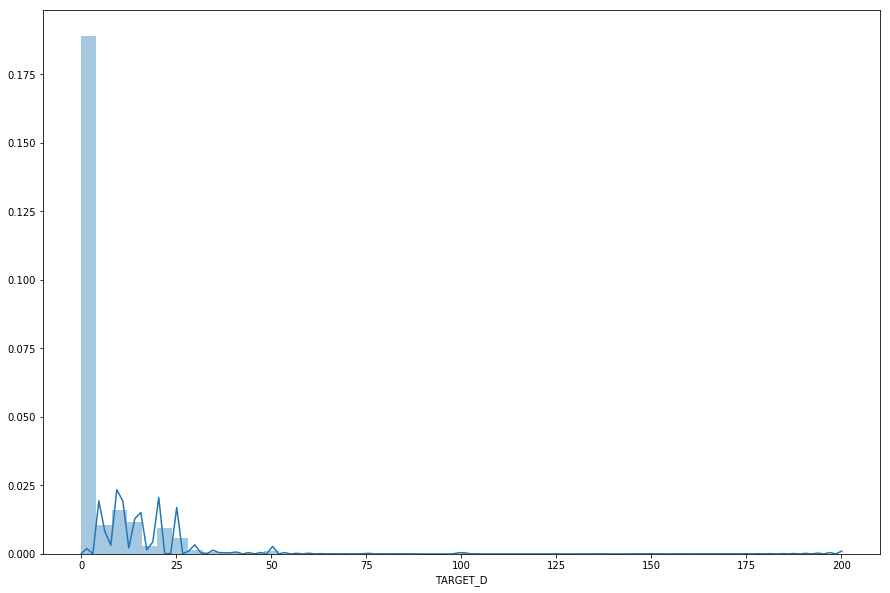

In [11]:
#To check the average amount of donations maximum donations is 0 and there are significant donations in the amount of 0-25
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['TARGET_D'])

In [12]:
#To divide the data into train and test data, here I have taken a split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle = True)


# Model 1: Linear Regression 

In [13]:
#Fitting the model and training it on the train data
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
#Feature prediction
predictions = regressor.predict(X_train)

In [15]:
y_pred = regressor.predict(X_test)


In [16]:
#To compare the model prediction with the actual values for donation amount(Target_d)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,0,5.487645
1,0,3.618876
2,7,2.719763
3,0,3.036243
4,0,3.564535
5,0,3.100493
6,0,3.119325
7,0,4.685238
8,0,3.079533
9,11,4.936085


To see the predicted values and the actual values for comparison

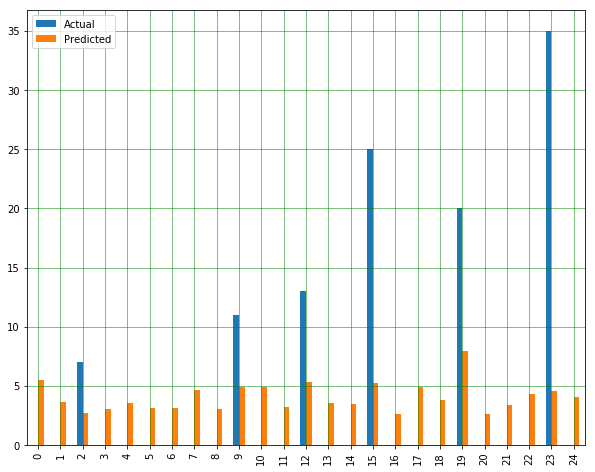

In [17]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 5.938006715689296
Mean Squared Error: 82.28774574819772
Root Mean Squared Error: 9.071259325374715


# Model 2: Random Forest Regressor

In [19]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Print out the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 6.256474879559532
Mean Squared Error: 86.69405286923606
Root Mean Squared Error: 9.31096412135908


In [21]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df3 = df2.head(25)
df3

,Actual,Predicted
0,0,4.243
1,0,2.797
2,7,2.139
3,0,4.110
4,0,6.627
5,0,2.033
6,0,4.088
7,0,6.085
8,0,4.098
9,11,5.716


# Model 3: Decision Tree Regressor

In [22]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [23]:
predictionsdtr = regressor.predict(X_test)

df4 = pd.DataFrame({'Actual': y_test, 'Predicted': predictionsdtr})
df5 = df4.head(25)
df5

,Actual,Predicted
0,0,0.0
1,0,0.0
2,7,0.0
3,0,7.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,15.0
9,11,0.0


In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictionsdtr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictionsdtr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictionsdtr)))

Mean Absolute Error: 6.748967653131452
Mean Squared Error: 184.818479008947
Root Mean Squared Error: 13.594796026750346


# Model 4: Support Vector Machine Regressor

In [28]:
from sklearn.svm import SVR 
model = SVR()


In [29]:
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
predictionssvr = model.predict(X_test)

df6 = pd.DataFrame({'Actual': y_test, 'Predicted': predictionssvr})
df7 = df6.head(25)
df7

,Actual,Predicted
0,0,0.433427
1,0,0.432275
2,7,0.433489
3,0,0.433428
4,0,0.433427
5,0,0.433427
6,0,0.433427
7,0,0.433427
8,0,0.433427
9,11,0.433427


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictionssvr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictionssvr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictionssvr)))

Mean Absolute Error: 4.141526392446799
Mean Squared Error: 97.18059421490732
Root Mean Squared Error: 9.858021820573706
